# Objectives

- to be able to analyze data meaningfully
- practicing basic EDA
- learning and testing some classification tools

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import Data as DataFrame

In [7]:
import pandas as pd
iris_df = pd.read_csv("datasets/iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Information about Dataset

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_df['Species'].unique().size # total uniqe item of categorical values

3

In [18]:
cat_cols = []
num_cols = []

for col in iris_df.columns:
    if iris_df[col].unique().size > 10: # assumeing that 10 is the maximum unique item for categorical columns
        num_cols.append(col)
        continue
    cat_cols.append(col)

print("num_cols : ",num_cols)
print("cat_cols : ",cat_cols)

num_cols :  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cat_cols :  ['Species']


## Checking for Outliers in Numerical Columns

In [39]:
outliers_threshold = 2
for col in num_cols:
    outliers = (stats.zscore(iris_df[col]) > outliers_threshold)
    print(f"{col} has {'no' if not outliers.any() else outliers.sum()} outliers")

Id has no outliers
SepalLengthCm has 6 outliers
SepalWidthCm has 4 outliers
PetalLengthCm has no outliers
PetalWidthCm has no outliers


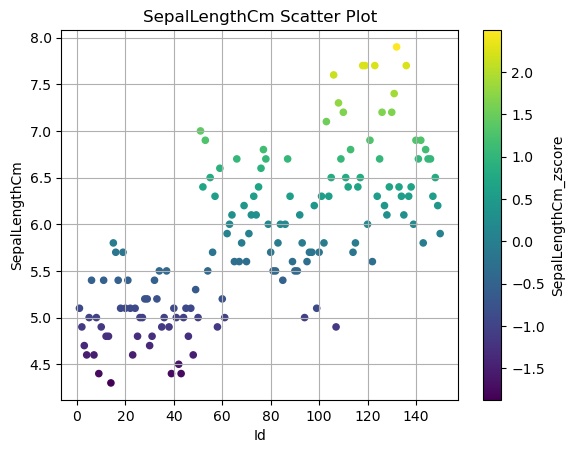

In [43]:
target_col = "SepalLengthCm"
temp_iris_df = iris_df.copy()
temp_iris_df[f"{target_col}_zscore"] = stats.zscore(temp_iris_df[target_col])

temp_iris_df.plot.scatter(x="Id",y=target_col,c=f"{target_col}_zscore")
plt.title(f"{target_col} Scatter Plot")
plt.grid(True)
plt.show()